In [1]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [2]:
import pandas as pd


In [33]:
df = pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [34]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

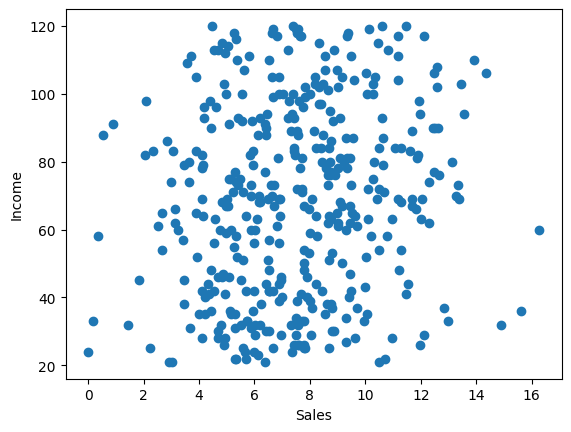

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['Sales'],df['Income'])
plt.xlabel('Sales')
plt.ylabel('Income')
plt.show()

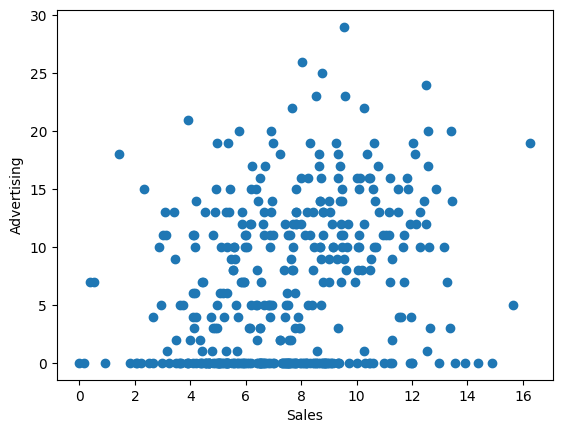

In [7]:
plt.scatter(df['Sales'],df['Advertising'])
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.show()

<Axes: >

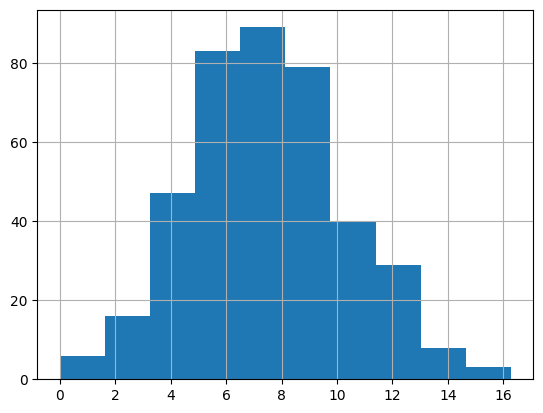

In [8]:
df['Sales'].hist()

<Axes: >

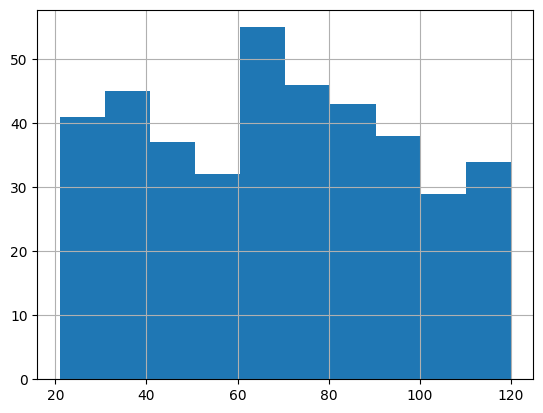

In [9]:
df['Income'].hist()

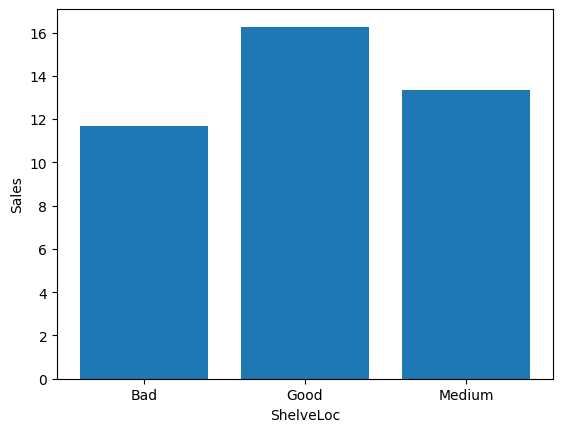

In [14]:
plt.bar(df['ShelveLoc'],df['Sales'])
plt.xlabel('ShelveLoc')
plt.ylabel('Sales')
plt.show()

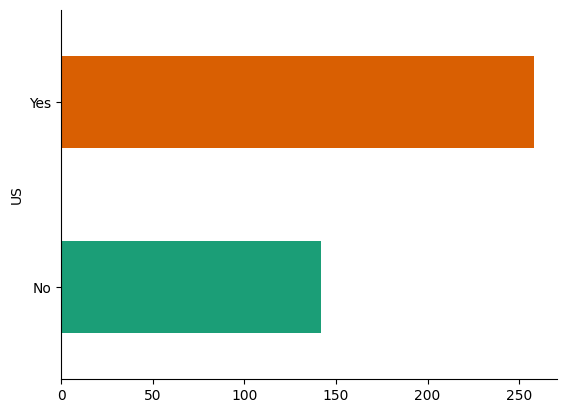

In [15]:
# @title US

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('US').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
         #converting the sales continous data into categorical data
df['Sales'].mean()

df['Sales'] = np.select(
    [df['Sales']<df['Sales'].mean(),
    df['Sales']>df['Sales'].mean()],
    ['low_sales', 'high_sales'],
    default='Other')

In [36]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['ShelveLoc'] = LE.fit_transform(df['ShelveLoc'])
df['Urban'] = LE.fit_transform(df['Urban'])
df['US'] = LE.fit_transform(df['US'])
df['Sales'] = LE.fit_transform(df['Sales'])
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [37]:
                    #splitting as X nd Y
Y=df["Sales"]
X=df.iloc[:,1:10]

In [39]:
                   # standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X

,0,1,2,3,4,5,6,7,8
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869
...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-0.369399,-1.256023,0.038208,0.646869
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.831899,0.103677,-1.108033,-1.545908
397,2.417512,-1.526151,0.807733,0.700853,1.827078,0.831899,-0.823391,1.566529,0.646869
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-1.570698,-0.205346,-0.725953,0.646869


In [49]:
# filling columns names in the ss_x
SS_X.columns = list(X.columns)
SS_X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869
...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-0.369399,-1.256023,0.038208,0.646869
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.831899,0.103677,-1.108033,-1.545908
397,2.417512,-1.526151,0.807733,0.700853,1.827078,0.831899,-0.823391,1.566529,0.646869
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-1.570698,-0.205346,-0.725953,0.646869


In [42]:
                     # Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y,test_size=0.30, random_state=1)

In [43]:
                 # RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,max_depth=8,
                        max_samples=0.6,
                        max_features=0.7)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_depth=8, max_features=0.7, max_samples=0.6)

In [44]:
Y_pred_train = RFC.predict(X_train)
Y_pred_test  = RFC.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(Y_train,Y_pred_train)
acc_test  = accuracy_score(Y_test,Y_pred_test)

In [47]:
print("Training Accuracy: ",acc_train.round(2))
print("Testing Accuracy: ",acc_test.round(2))

Training Accuracy:  0.99
Testing Accuracy:  0.79


In [48]:
training_accuracy = []
test_accuracy = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y,test_size=0.30,random_state=i)
    RFC.fit(X_train,Y_train)
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

k1 = pd.DataFrame(training_accuracy)
k2 = pd.DataFrame(test_accuracy)

print("\n\n")
print("\t\t\t\t\t\t\tCOMPANY_DATA\t")
print("\t\t******cross validation using RandomForestRegressor results******")
print("Cross validation training accuracy results:",k1.mean().round(2))
print("Cross validation test accuracy results:",k2.mean().round(2))
print("variance:",np.mean(k1.mean()-k2.mean()).round(2))
print("standard deviation:",np.std(k1.mean()-k2.mean()).round(2))




							COMPANY_DATA	
		******cross validation using RandomForestRegressor results******
Cross validation training accuracy results: 0    0.99
dtype: float64
Cross validation test accuracy results: 0    0.79
dtype: float64
variance: 0.2
standard deviation: 0.0
